# Final

Đây là một tập dữ liệu về hiện trạng dân số Việt Nam từ năm 2011 đến năm 2020. Bộ dữ liệu bao gồm các dữ liệu về: mật độ dân số, dân số trung bình, tỷ số giới tính, tỷ lệ gia tăng dân số tự nhiên và dữ liệu về lực lượng lao động từ 15 tuổi trở lên.

Link tập dữ liệu: https://data.vietnam.opendevelopmentmekong.net/dataset/vietnam-population-status-2011-2016?fbclid=IwAR3Oqn--ikqSRbiJcAUYQMVebb0yL75e72l6uZ16ePDw52V6F3zjBfQ96LU

Đăng bởi: Open Development Vietnam

Tập dữ liệu này có nguồn kiểm chứng từ: Creative Commons Attribution Share-Alike


## Thu thập dữ liệu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
population_df = pd.read_csv('population_vi_v2.csv')
population_df.sample(5)

,Các tỉnh thành,Mật độ dân số,Dân số trung bình,Tỷ lệ giới tính,Tỷ lệ gia tăng dân số,Lực lương lao động từ 15 tuổi trở lên,Vùng,Năm
624,Kiên Giang,272.0,1728.9,102.84,0.30,923.98,Đồng bằng sông Cửu Long,2020
174,Bà Rịa - Vũng Tàu,526.0,1046.5,99.40,1.31,577.60,Đông Nam Bộ,2013
28,Quảng Bình,105.8,853.4,100.10,0.56,484.40,Bắc Trung bộ và duyên hải miền Trung,2011
294,Đắk Nông,90.0,587.8,102.30,2.90,374.00,Tây Nguyên,2015
620,Trà Vinh,428.0,1009.9,96.85,0.06,561.34,Đồng bằng sông Cửu Long,2020


## Khám phá dữ liệu

### Ý nghĩa của từng thuộc tính

* "Các tỉnh thành": Tên tỉnh thành của từng mẫu dữ liệu
* "Mật độ dân số": Mật độ dân số trên một km^2.
* "Dân số trung bình": Dân số tính bình quân trong một năm (ngàn người)
* "Tỷ lệ giới tính": Tỷ lệ nam giới trên 100 nữ.
* "Tỷ lệ gia tăng dân số": Tỉ suất dân số gia tăng (%)
* "Lực lượng lao động từ 15 tuổi trở lên": Số lượng người lao động từ 15 tuổi trở lên (ngàn người)

Nhìn chung thì mỗi tiêu đề mỗi cột trong bộ dữ liệu tương đối rõ ràng.

### Kích thước của tập dữ liệu ?

In [3]:
population_df.shape

(630, 8)

###  Có dòng bị trùng lặp không ?

In [4]:
check =  population_df.duplicated().any()
check

False

### Dữ liệu bị khuyết ?

In [5]:
population_df.isnull().sum()

Các tỉnh thành                           0
Mật độ dân số                            0
Dân số trung bình                        0
Tỷ lệ giới tính                          0
Tỷ lệ gia tăng dân số                    0
Lực lương lao động từ 15 tuổi trở lên    0
Vùng                                     0
Năm                                      0
dtype: int64

Không có thuộc tính nào bị khuyết dữ liệu

### Kiểu dữ liệu của từng thuộc tính

In [6]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Các tỉnh thành                         630 non-null    object 
 1   Mật độ dân số                          630 non-null    float64
 2   Dân số trung bình                      630 non-null    float64
 3   Tỷ lệ giới tính                        630 non-null    float64
 4   Tỷ lệ gia tăng dân số                  630 non-null    float64
 5   Lực lương lao động từ 15 tuổi trở lên  630 non-null    float64
 6   Vùng                                   630 non-null    object 
 7   Năm                                    630 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 39.5+ KB


* Các thuộc tính ở 2 dạng dữ liệu là object và float64
* Các thuộc tính có dạng categorical data là: "Các tỉnh thành" và "Vùng", còn lại là dữ liệu dạng numeric.

### Tính đúng đắn của dữ liệu

In [7]:
print(population_df['Các tỉnh thành'].nunique())
for name, dataframe in population_df.groupby('Các tỉnh thành'):
  print(name, dataframe['Năm'].unique())

63
An Giang [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bà Rịa - Vũng Tàu [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bình Dương [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bình Phước [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bình Thuận [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bình Định [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bạc Liêu [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bắc Giang [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bắc Kạn [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bắc Ninh [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Bến Tre [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Cao Bằng [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Cà Mau [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Cần Thơ [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Gia Lai [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Hà Giang [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Hà Nam [20

Dữ liệu đầy đủ thông tin dân số của 63 tỉnh thành ở Việt Nam từ năm 2011 tới năm 2020 như mô tả. Với việc không có dữ liệu trùng lặp, khuyết, dạng dữ liệu và thông tin chính xác nên chúng ta không cần phải tiền xử lý dữ liệu thêm. 

## Thống kê mô tả

Chúng ta chỉ lấy 1 năm duy nhất là năm 2020 để có cái nhìn phân bố dân số của các tỉnh thành Việt Nam

In [8]:
population_2020_df = population_df[population_df['Năm'] == 2020]
population_2020_df.describe()

,Mật độ dân số,Dân số trung bình,Tỷ lệ giới tính,Tỷ lệ gia tăng dân số,Lực lương lao động từ 15 tuổi trở lên,Năm
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,520.253968,1623.419048,99.934603,0.942063,870.523175,2020.0
std,684.593592,1565.211275,2.550202,0.886232,757.380047,0.0
min,52.000000,316.500000,94.930000,-0.330000,205.970000,2020.0
25%,136.500000,872.250000,98.075000,0.405000,515.945000,2020.0
50%,272.000000,1240.400000,100.110000,0.770000,692.830000,2020.0
75%,630.000000,1721.300000,101.535000,1.390000,920.665000,2020.0
max,4476.000000,9227.600000,105.000000,5.060000,4769.630000,2020.0


Quan sát thầy rằng các cột trừ cột tỷ lệ giới tính đều có giá trị max lớn hơn giá trị Q3 rất nhiều. Có thể tập dữ liệu sẽ bị lệch phải.

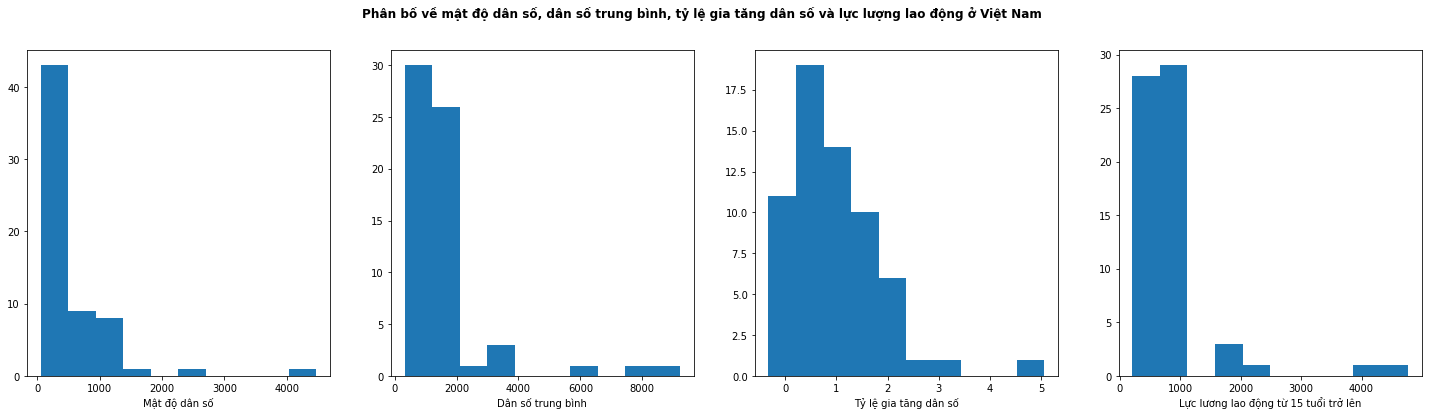

In [9]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(141)
ax1.hist(x = 'Mật độ dân số', data = population_2020_df)
ax1.set_xlabel('Mật độ dân số')

ax2 = fig.add_subplot(142)
ax2.hist(x = 'Dân số trung bình', data = population_2020_df)
ax2.set_xlabel('Dân số trung bình')

ax3 = fig.add_subplot(143)
ax3.hist(x = 'Tỷ lệ gia tăng dân số', data = population_2020_df)
ax3.set_xlabel('Tỷ lệ gia tăng dân số')

ax4 = fig.add_subplot(144)
ax4.hist(x = 'Lực lương lao động từ 15 tuổi trở lên', data = population_2020_df)
ax4.set_xlabel('Lực lương lao động từ 15 tuổi trở lên')

fig.suptitle('Phân bố về mật độ dân số, dân số trung bình, tỷ lệ gia tăng dân số và lực lượng lao động ở Việt Nam', fontweight = 'bold')
plt.show()

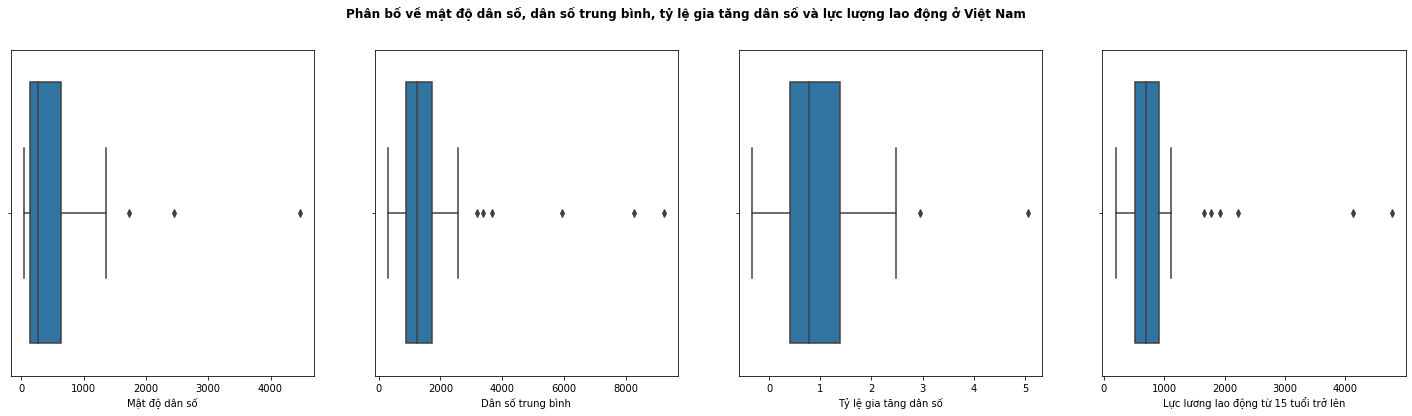

In [10]:
fig = plt.figure(figsize=(25,6))
ax1 = fig.add_subplot(141)
sns.boxplot(ax = ax1, x = 'Mật độ dân số', data = population_2020_df)

ax2 = fig.add_subplot(142)
sns.boxplot(ax = ax2, x = 'Dân số trung bình', data = population_2020_df)

ax3 = fig.add_subplot(143)
sns.boxplot(ax = ax3, x = 'Tỷ lệ gia tăng dân số', data = population_2020_df)

ax4 = fig.add_subplot(144)
sns.boxplot(ax = ax4, x = 'Lực lương lao động từ 15 tuổi trở lên', data = population_2020_df)

fig.suptitle('Phân bố về mật độ dân số, dân số trung bình, tỷ lệ gia tăng dân số và lực lượng lao động ở Việt Nam', fontweight = 'bold')
plt.show()

Nhận xét dựa vào biểu đồ boxplot và histogram:

* Suy nghĩ ban đầu của ta là đúng khi cả 4 thuộc tính đều bị lệch về bên phải, các giá trị tập trung hầu ở các giá trị nhỏ, riêng chỉ có vài tỉnh thành là ngoại lệ.

  * Mật độ dân số phân bố chủ yếu ở mức 100 - 600 /km^2
  * Dân số trung bình phân bố chủ yếu ở 800 - 1500 ngàn người 
  * Tỷ lệ gia tăng dân số thường ở mức 0.5 - 1 % mỗi năm 
  * Lực lượng lao động > 15 ở mức 300 - 1000 ngàn người 
  * Các tỉnh có ngoại lệ so với biểu đồ gồm: Hà Nội, Hồ Chí Minh. Điều này tương đối dễ hiểu vì đây là 2 TP lớn của Việt Nam.

In [11]:
population_2020_df[population_2020_df['Mật độ dân số'] > 2000]

,Các tỉnh thành,Mật độ dân số,Dân số trung bình,Tỷ lệ giới tính,Tỷ lệ gia tăng dân số,Lực lương lao động từ 15 tuổi trở lên,Vùng,Năm
567,Hà Nội,2455.0,8246.6,98.09,1.89,4124.62,Đồng bằng sông Hồng,2020
616,Hồ Chí Minh,4476.0,9227.6,94.93,2.09,4769.63,Đông Nam Bộ,2020


## Phân tích dữ liệu đơn giản

### Phân bố các tỉnh giữa các vùng

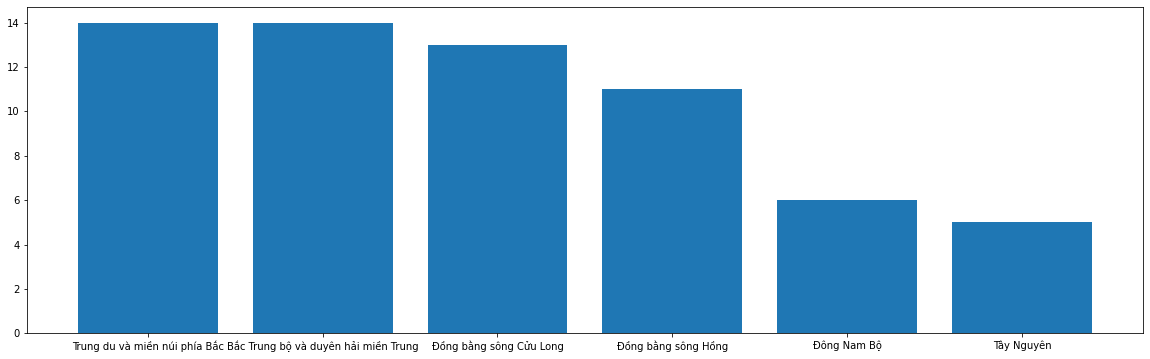

In [12]:
y = population_2020_df['Vùng'].value_counts()
x = y.index

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(x, y)
ax.set_xticks(population_2020_df['Vùng'].unique())
plt.show()

Có 6 loại vùng dựa theo vùng kinh tế - xã hội ở Việt Nam: Trung du và miền núi phía Bắc, Bắc Trung bộ và duyên hải miền Trung, Đồng bằng sông Cửu Long, Đồng bằng sông Hồng, Đông Nam Bộ, Tây Nguyên.

Các vùng kinh tế có nhiều tỉnh thành nhất là: Trung du và miền núi phía Bắc, Bắc Trung bộ và duyên hải miền Trung và Đồng bằng sông Cửu Long.

### Phân bố dân số giữa các vùng

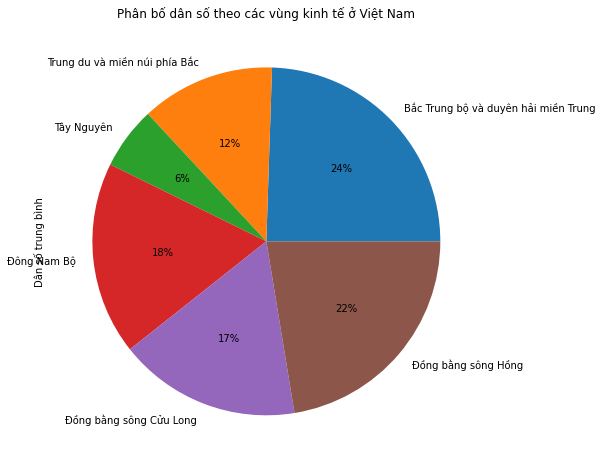

In [13]:
titles = 'Phân bố dân số theo các vùng kinh tế ở Việt Nam'
fig, ax = plt.subplots(figsize = (15,8))
population_2020_df.groupby('Vùng')['Dân số trung bình'].sum().plot.pie(ax = ax, autopct='%1.0f%%', figsize = (15,8), title = titles)
plt.show()

Lực lượng dân cư tập trung đông ở 3 vùng kinh tế trọng điểm của Bắc, Trung, Nam.

Riêng vùng kinh tế phía Nam: Dân số tập trung đông gần gấp đôi 2 vùng kinh tế Bắc, Trung.

### Độ tương quan giữa các trường dữ liệu

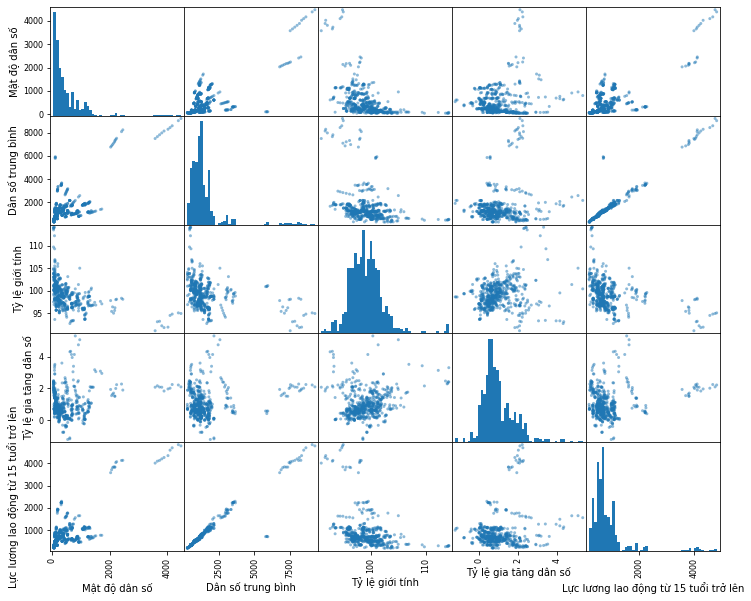

In [14]:
columns = ['Mật độ dân số', 'Dân số trung bình',
           'Tỷ lệ giới tính', 'Tỷ lệ gia tăng dân số',
           'Lực lương lao động từ 15 tuổi trở lên']

scatter_matrix(population_df[columns], figsize=(12,10), hist_kwds={'bins': 50});

Nhận xét:

* Mật độ dân số, dân số trung bình có quan hệ tuyến tính dương với lực lượng lao động. Điều này khá hợp lí bởi ngoài số dân đông, các tỉnh thành lớn còn có nhu cầu lao động cao nên thu hút nhiều nhân lực.

* Các tỉnh có số dân đông lại có tỷ lệ gia tăng dân số thấp hơn các tỉnh ít dân.

* Các tỉnh có dân số đông thường bị chênh lệch về tỉ lệ giới tính (tỉ lệ < 1).

### Trực quan kiểm tra tính tuyến tính của các trường dữ liệu

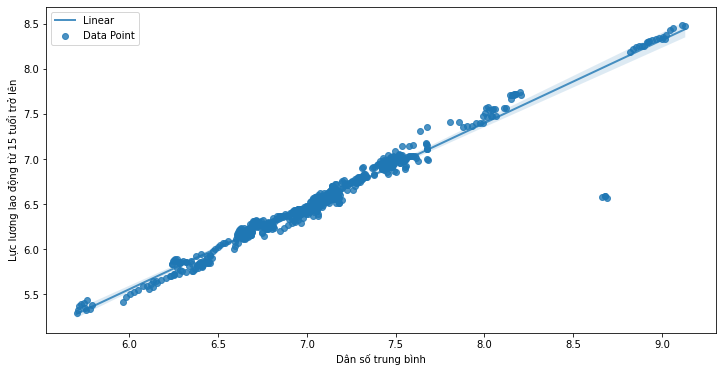

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(ax = ax, x = np.log(population_df['Dân số trung bình']), y = np.log(population_df['Lực lương lao động từ 15 tuổi trở lên']), label = 'Data Point',
                 line_kws={'alpha': 0.8, 'linewidth': 2, 'label': 'Linear'})

ax.legend()
plt.show()

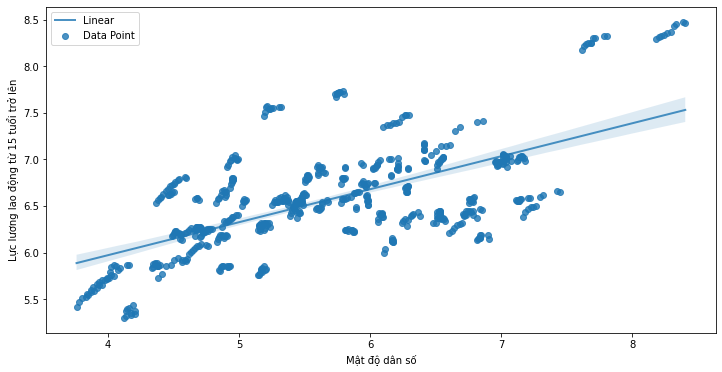

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(ax = ax, x = np.log(population_df['Mật độ dân số']), y = np.log(population_df['Lực lương lao động từ 15 tuổi trở lên']), label = 'Data Point',
                 line_kws={'alpha': 0.8, 'linewidth': 2, 'label': 'Linear'})

ax.legend()
plt.show()

Nhận thấy rằng "Dân số trung bình" thể hiện mối quan hệ tuyến tính với "Lực lượng lao động trên 15 tuổi" tốt hơn so với "Mật độ dân số". Lí do là "Mật độ dân số" = "Dân số trung bình" / Diện tích của tỉnh, điều tạo ra nhiều giá trị outlier và mô hình hồi quy tuyến tính rất nhạy cảm với các giá trị này.

## Phân tích hồi quy, giải thích và dự đoán



### OLS

Giả sử dân số trung bình của Việt Nam tại thời điểm t ~ Tổng tất cả dân số trung bình ở mọi tỉnh thành. Ta xây dựng mô hình hồi qui tuyến tính để dự đoán dân số trung bình của Việt Nam ở các năm trong tương lai.

In [17]:
y = population_df.groupby('Năm')['Dân số trung bình'].sum()

x = y.index.values.reshape(-1,1)
y = y.values.reshape(-1,1)
X = sm.add_constant(x)

result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     133.4
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           2.87e-06
Time:                        05:43:55   Log-Likelihood:                -85.285
No. Observations:                  10   AIC:                             174.6
Df Residuals:                       8   BIC:                             175.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.412e+06   3.04e+05    -11.238      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


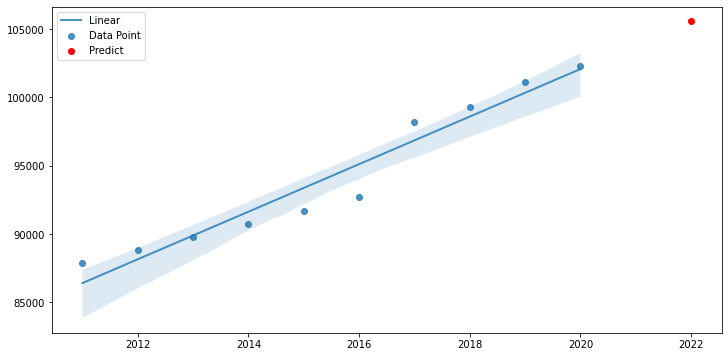

In [18]:
y_predict = result.predict([1,2022])
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(ax = ax, x = x, y = y, label = 'Data Point',
                 line_kws={'alpha': 0.8, 'linewidth': 2, 'label': 'Linear'})
ax.scatter(2022, y_predict, color = 'r', label = 'Predict')
ax.legend()
plt.show()

Dự đoán dân số trung bình Việt Nam 2022 là: 105554 ngàn người

In [19]:
print('Dự đoán dân số Việt Nam 2022 là:', y_predict[0])

print(y_predict[0] - 1739.4545 * 2022)

Dự đoán dân số Việt Nam 2022 là: 105553.69454545621
-3411623.304454544


### ARIMA

In [20]:
y = population_df.groupby('Năm')['Dân số trung bình'].sum()
y = pd.DataFrame(y)

model_arima = ARIMA(y, order = (1,2,0))
model_arima_fit = model_arima.fit(disp = -1)
print(model_arima_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D2.Dân số trung bình   No. Observations:                    8
Model:                   ARIMA(1, 2, 0)   Log Likelihood                 -71.705
Method:                         css-mle   S.D. of innovations           1851.786
Date:                  Fri, 24 Jun 2022   AIC                            149.410
Time:                          05:43:55   BIC                            149.648
Sample:                               2   HQIC                           147.802
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         59.8563    448.888      0.133      0.898    -819.948     939.660
ar.L1.D2.Dân số trung bình    -0.5263      0.265     -1.985      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


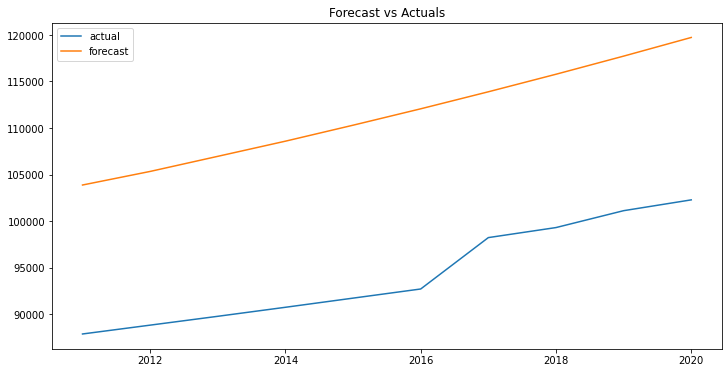

In [21]:
fc, se, conf = model_arima_fit.forecast(10, alpha=0.05)
fc_series = pd.Series(fc, index = y.index)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y, label='actual')
ax.plot(fc_series, label='forecast')
ax.set_title('Forecast vs Actuals')
ax.legend()
plt.show()

In [22]:
mae = np.mean(np.abs(fc - y.squeeze()))
corr = np.corrcoef(fc, y.squeeze())[0,1]

print('Corr:',corr)
print('MAE:',mae)

Corr: 0.9767672048987529
MAE: 17177.41038899593


Nhận xét: 
* OLS:
  * Hồi quy OLS là mô hình cho kết quả tốt nhất khi các điểm dữ liệu nằm khá sát đường dự đoán.
  * Với việc chỉ có 10 sample nhưng chúng ta chỉ sử dụng 1 biến độc lập ('Năm') để dự đoán nên kết quả có thể tin tưởng. 

* ARIMA:
  * Mô hình ARIMA cho hệ số tương quan khá tốt nhưng độ lỗi lớn hơn nhiều so với mô hình hồi quy OLS, cho thấy mô hình không phù hợp khi chúng ta có quá ít dữ liệu để train (ARIMA thường yêu cầu tối thiểu 50 mẫu để có thể cho kết quả có ý nghĩa).
